# Energy Consumption Analysis

**MAIN GOAL**: analyze and study the distribubion of energy consumptions (energy, heat consumptions and CO2 emissions) among energy units (buildings) of Comune di Reggio Emilia

## Dataset Link


The data are extratcted from the open data section of Comune di Reggio Emilia. 
This data are referred to the period 2008-2014

- https://opendata.comune.re.it/dataset/unita-energetiche-comunali-di-reggio-emilia-uso-prevalente
- https://opendata.comune.re.it/dataset/unita-energetiche-comunali-di-reggio-emilia-consumi-termici
- https://opendata.comune.re.it/dataset/unita-energetiche-comunali-di-reggio-emilia-consumi-elettrici
- https://opendata.comune.re.it/dataset/unita-energetiche-comunali-di-reggio-emilia-stima-emissioni-co2
- https://opendata.comune.re.it/dataset/unita-energetiche-comunali-di-reggio-emilia-etichette-energetiche

## Analysis Goals


The final information that we want to evaluate are:
- The division (in percentage) of energy consumption among different energy units
- The division (in percentage) of energy consumption among different types of energy units (buildings, football fields, etc.)
- The division (in percentage) of energy consumption correlated with year of construction
- The mean of energy consumption during the time period
- The comparison of data with regional values, if possible, to evaluate the difference from regional means
- The comparison of data with regional values, if possible, to understand the weight of Reggio Emilia compared to data in Emilia Romagna

## Code

### Import Required Libraries

In [93]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Useful Functions

In [94]:
def bar_plot(figsize, x,y, data_range, xlabel, ylabel, title, y_ticks=[], color='#dc804b', width=0.6, xrotation=False, x_newlabels=[], y_labels=False):
    fig1 = plt.figure(figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(x[:data_range], y[:data_range], color=color, width=width)
    plt.title(title)

    # Enable x ticks rotation
    if xrotation:
        plt.xticks(rotation=45)
    
    # Changing x labels
    if len(x_newlabels) != 0:
        print(x_newlabels)
        plt.xticks(x[:data_range], labels=x_newlabels)

    # Changing y labels
    if len(y_ticks) != 0:
        plt.yticks(y_ticks)

    # Adding values into bars
    if y_labels: 
        for i in range(len(x[:data_range])):
            plt.text(i, y[i]//2, round(y[i]), ha = 'center', 
                bbox = dict(facecolor = 'white', alpha = .5))
    
#    return fig1

In [95]:
# Function to plot a line plot
def plot(figsize, x, y, xlabel, ylabel, title, xticks=[]):
    fig = plt.figure(figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y, marker='x')
    plt.title(title)

    if len(xticks) != 0:
        plt.xticks(xticks)

In [96]:
# Function to plot a line plot
def multiple_plot(figsize, xs, ys, xlabel, ylabel, title, xticks=[], ylabels=[]):
    fig = plt.figure(figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for i in range(len(xs)):
        plt.plot(xs[i], ys[i], marker='x',label=ylabels[i])

    if len(xticks) != 0:
        plt.xticks(xticks)
    plt.legend()

In [97]:
def pie_chart(figsize, title, values, labels, legend_loc='lower right'):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    plt.pie(values, labels=labels, autopct='%.2f%%')
    plt.legend(loc=legend_loc)

### Read Source Data

#### Energy Unit Lists

In [98]:
## Read data
anag_rawdata = open('dataset/GSC_P_UE_ANAGRAFICA.json')
anag_jsondata = json.load(anag_rawdata)

## Prepare data structure
building_data = {
    'UUID': [],
    'NAME': [],
    'TYPE': [],
    'BUILDING_DATE': [],
    'VOLUME': []
}

## Populate data structure
for b in anag_jsondata['features']:
    #print(b['properties'])
    building_data['UUID'].append(b['properties']['UUID'])
    building_data['NAME'].append(b['properties']['NAME'])
    building_data['TYPE'].append(b['properties']['USE_S'])
    building_data['BUILDING_DATE'].append(b['properties']['DATE_C_BEGINNING'])
    building_data['VOLUME'].append(b['properties']['VOLUME_VALUE'])
print(building_data)

{'UUID': ['UE001', 'UE002', 'UE003', 'UE004', 'UE005', 'UE006', 'UE007', 'UE008', 'UE009', 'UE010', 'UE011', 'UE012', 'UE014', 'UE015', 'UE016', 'UE017', 'UE018', 'UE019', 'UE020', 'UE021', 'UE022', 'UE023', 'UE024', 'UE025', 'UE026', 'UE027', 'UE028', 'UE029', 'UE031', 'UE032', 'UE033', 'UE034', 'UE035', 'UE036', 'UE037', 'UE038', 'UE039', 'UE040', 'UE041', 'UE042', 'UE043', 'UE044', 'UE046', 'UE047', 'UE048', 'UE049', 'UE050', 'UE051', 'UE052', 'UE053', 'UE054', 'UE055', 'UE056', 'UE057', 'UE058', 'UE059', 'UE060', 'UE061', 'UE062', 'UE063', 'UE064', 'UE065', 'UE066', 'UE067', 'UE068', 'UE069', 'UE070', 'UE071', 'UE072', 'UE073', 'UE074', 'UE075', 'UE076', 'UE077', 'UE078', 'UE079', 'UE080', 'UE081', 'UE082', 'UE083', 'UE084', 'UE085', 'UE086', 'UE087', 'UE088', 'UE089', 'UE090', 'UE091', 'UE092', 'UE093', 'UE094', 'UE095', 'UE096', 'UE097', 'UE098', 'UE099', 'UE100', 'UE102', 'UE103', 'UE104', 'UE105', 'UE106', 'UE107', 'UE109', 'UE110', 'UE111', 'UE112', 'UE113', 'UE114', 'UE115', 

In [99]:
## Create Pandas Dataset
buildings_dataset = pd.DataFrame.from_dict(building_data, orient='columns')
buildings_dataset = buildings_dataset.set_index('UUID')
buildings_dataset.head(20)

,NAME,TYPE,BUILDING_DATE,VOLUME
UUID,,,,
UE001,PORTINERIA CIMITERO MONUMENTALE,cemetery,NaN,217.43
UE002,CIMITERO DI COVIOLO,cemetery,1976.0,5838.00
UE003,FABBRICATO JERRY MASSLO (MINIAPPART. S.PROSPERO),residenceForCommunities,1916.0,2927.00
UE004,CASA ALBERGO COMUNALE,residenceForCommunities,NaN,3912.08
UE005,RESIDENZE VIA DALMAZIA,residenceForCommunities,1910.0,1744.00
UE006,CASA DELLE DONNE,residenceForCommunities,NaN,1183.00
UE007,COOP. SOCIALE IL GIRASOLE,residenceForCommunities,1979.0,760.25
UE008,PENSIONATO CAVAZZOLI,residenceForCommunities,1941.0,2502.00
UE009,CENTRO POLISPORTIVO REVERBERI,sportServices,1970.0,10028.00


#### Energy Consumption

In [100]:
## Read data
energy_rawdata = open('dataset/GSC_P_UE_CONSUMI_ELETTRICI.json')
energy_jsondata = json.load(energy_rawdata)

## Prepare data structure
energy_consumption_data = {
    'UUID': [],
    'ENERGY_CLASS': [],
    'CONSUMPTION': [],
    'YEAR':[],
    'VOLUME': [],
    'TYPE': []
}

## Populate data structure
for e in energy_jsondata['features']:
    #print(e['properties'])
    energy_consumption_data['UUID'].append(e['properties']['UUID'])
    energy_consumption_data['ENERGY_CLASS'].append(e['properties']['CONSUMONORM_CLASSE'])
    energy_consumption_data['CONSUMPTION'].append(e['properties']['CONSUMONORM_VALORE'])
    energy_consumption_data['YEAR'].append(e['properties']['ENERGYAMOUNT_E_YEAR_ONLY'])
    energy_consumption_data['VOLUME'].append(e['properties']['VOLUME_VALUE'])
    energy_consumption_data['TYPE'].append(e['properties']['USE_S'])
print(energy_consumption_data)

{'UUID': ['UE001', 'UE001', 'UE001', 'UE001', 'UE002', 'UE002', 'UE002', 'UE002', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE004', 'UE004', 'UE004', 'UE004', 'UE004', 'UE004', 'UE004', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE009', 'UE010', 'UE010', 'UE010', 'UE010', 'UE010', 'UE010', 'UE010', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE012', 'UE012', 'UE012', 'UE012', 'UE012', 'UE012', 'UE012', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE015', 'UE015', 'UE015', 'UE015', 'UE016', 'UE016', 'UE016', 'UE016', 'UE016', 'UE016', 'UE016', 'UE017', 'UE017', 'UE017', 'UE017', 'UE017', 'UE017', 'UE017', 'UE018', 'UE018', 'UE018', 'UE018', 'UE018', 'UE018', 'UE018', 'UE019', 'UE019', 'UE019', 'UE019', 'UE020', 'UE020', 

In [101]:
## Create Pandas Dataset
ee_dataset = pd.DataFrame.from_dict(energy_consumption_data, orient='columns')
ee_dataset = ee_dataset.set_index('UUID')
ee_dataset.head(20)

,ENERGY_CLASS,CONSUMPTION,YEAR,VOLUME,TYPE
UUID,,,,,
UE001,XXL,232.3,2013,217.43,cemetery
UE001,XXL,241.1,2012,217.43,cemetery
UE001,XXL,218.5,2014,217.43,cemetery
UE001,XXL,94.4,2011,217.43,cemetery
UE002,XL,17.1,2014,5838.00,cemetery
UE002,XXL,36.8,2011,5838.00,cemetery
UE002,XXL,25.4,2013,5838.00,cemetery
UE002,XXL,27.3,2012,5838.00,cemetery
UE003,M,4.4,2012,2927.00,residenceforcommunities


#### Heat Consumption

In [102]:
## Read data
heat_rawdata = open('dataset/GSC_P_UE_CONSUMI_TERMICI.json')
heat_jsondata = json.load(heat_rawdata)

## Prepare data structure
heat_consumption_data = {
    'UUID': [],
    'ENERGY_CLASS': [],
    'CONSUMPTION': [],
    'FUEL_TYPE':[],
    'YEAR': [],
    'VOLUME': [], 
    'TYPE': []
}

## Populate data structure
for h in heat_jsondata['features']:
    #print(h['properties'])
    heat_consumption_data['UUID'].append(h['properties']['UUID'])
    heat_consumption_data['ENERGY_CLASS'].append(h['properties']['CONSUMONORM_CLASSE'])
    heat_consumption_data['CONSUMPTION'].append(h['properties']['CONSUMONORM_VALORE'])
    heat_consumption_data['FUEL_TYPE'].append(h['properties']['ENERGYAMOUNT_FUEL'])
    heat_consumption_data['YEAR'].append(h['properties']['ENERGYAMOUNT_E_YEAR_ONLY'])
    heat_consumption_data['VOLUME'].append(h['properties']['VOLUME_VALUE'])
    heat_consumption_data['TYPE'].append(h['properties']['USE_S'])
print(heat_consumption_data)

{'UUID': ['UE001', 'UE001', 'UE001', 'UE001', 'UE001', 'UE001', 'UE002', 'UE002', 'UE002', 'UE002', 'UE002', 'UE002', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE004', 'UE004', 'UE004', 'UE004', 'UE004', 'UE004', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE009', 'UE009', 'UE009', 'UE009', 'UE009', 'UE009', 'UE010', 'UE010', 'UE010', 'UE010', 'UE010', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE012', 'UE012', 'UE012', 'UE012', 'UE012', 'UE012', 'UE013', 'UE013', 'UE013', 'UE013', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE015', 'UE015', 'UE015', 'UE015', 'UE015', 'UE015', 'UE016', 'UE016', 'UE016', 'UE016', 'UE016', 'UE016', 'UE017', 'UE017', 'UE017', 'UE017', 'UE017', 'UE017', 'UE018', 'UE018', 'UE018', 'UE018', 

In [103]:
## Create Pandas Dataset
eh_dataset = pd.DataFrame.from_dict(heat_consumption_data, orient='columns')
eh_dataset = eh_dataset.set_index('UUID')
eh_dataset.head(20)

,ENERGY_CLASS,CONSUMPTION,FUEL_TYPE,YEAR,VOLUME,TYPE
UUID,,,,,,
UE001,XXL,215.9,liquidPropaneGas,2008,217.43,cemetery
UE001,XXL,269.9,liquidPropaneGas,2009,217.43,cemetery
UE001,XXL,307.0,liquidPropaneGas,2010,217.43,cemetery
UE001,XXL,251.9,liquidPropaneGas,2011,217.43,cemetery
UE001,XXL,256.4,liquidPropaneGas,2012,217.43,cemetery
UE001,XXL,261.8,liquidPropaneGas,2013,217.43,cemetery
UE002,XL,70.0,naturalGas,2008,5838.00,cemetery
UE002,L,50.1,naturalGas,2010,5838.00,cemetery
UE002,M,42.9,naturalGas,2011,5838.00,cemetery


#### Energy Class

In [104]:
## Read data
class_rawdata = open('dataset/GSC_P_UE_ETICHETTA_ENERGETICA.json')
class_jsondata = json.load(class_rawdata)

## Prepare data structure
class_data = {
    'UUID': [],
    'NAME': [],
    'ENERGY_CLASS': [],
    'REGISTERED_VALUE':[],
    'CERT_COUNT': [],
    'VOLUME': [], 
    'TYPE': []
}

## Populate data structure
for c in class_jsondata['features']:
    #print(c['properties'])
    class_data['UUID'].append(c['properties']['UUID'])
    class_data['NAME'].append(c['properties']['NAME'])
    class_data['ENERGY_CLASS'].append(c['properties']['ETICHETTA_CLASSE'])
    class_data['REGISTERED_VALUE'].append(c['properties']['ETICHETTA_VALORE'])
    class_data['CERT_COUNT'].append(c['properties']['CERT_COUNT'])
    class_data['VOLUME'].append(c['properties']['ENERGYPERF_VOLUME_VALUE'])
    class_data['TYPE'].append(c['properties']['USE_S'])
    
print(class_data)

{'UUID': ['UE052', 'UE001', 'UE002', 'UE003', 'UE004', 'UE006', 'UE007', 'UE008', 'UE009', 'UE010', 'UE011', 'UE012', 'UE013', 'UE014', 'UE015', 'UE016', 'UE017', 'UE018', 'UE019', 'UE020', 'UE021', 'UE022', 'UE023', 'UE026', 'UE027', 'UE028', 'UE029', 'UE031', 'UE032', 'UE033', 'UE034', 'UE036', 'UE037', 'UE038', 'UE039', 'UE040', 'UE041', 'UE042', 'UE043', 'UE044', 'UE046', 'UE047', 'UE048', 'UE049', 'UE050', 'UE051', 'UE053', 'UE054', 'UE055', 'UE056', 'UE057', 'UE058', 'UE059', 'UE060', 'UE061', 'UE062', 'UE063', 'UE064', 'UE065', 'UE066', 'UE067', 'UE068', 'UE069', 'UE070', 'UE071', 'UE072', 'UE073', 'UE074', 'UE075', 'UE076', 'UE077', 'UE078', 'UE079', 'UE080', 'UE081', 'UE082', 'UE083', 'UE084', 'UE085', 'UE086', 'UE087', 'UE088', 'UE089', 'UE090', 'UE091', 'UE092', 'UE093', 'UE094', 'UE095', 'UE096', 'UE097', 'UE098', 'UE099', 'UE100', 'UE102', 'UE118', 'UE119', 'UE105', 'UE106', 'UE104', 'UE103'], 'NAME': ['COMPLESSO SCOLASTICO CALVINO-GALVANI', 'PORTINERIA CIMITERO MONUMENTAL

In [105]:
## Create Pandas Dataset
ec_dataset = pd.DataFrame.from_dict(class_data, orient='columns')
ec_dataset = ec_dataset.set_index('UUID')
ec_dataset.head(20)

,NAME,ENERGY_CLASS,REGISTERED_VALUE,CERT_COUNT,VOLUME,TYPE
UUID,,,,,,
UE052,COMPLESSO SCOLASTICO CALVINO-GALVANI,L,50.2,1,33257.00,school
UE001,PORTINERIA CIMITERO MONUMENTALE,XXL,116.8,1,217.43,cemetery
UE002,CIMITERO DI COVIOLO,XL,65.9,1,5152.00,cemetery
UE003,FABBRICATO JERRY MASSLO (MINIAPPART. S.PROSPERO),L,44.3,1,3642.50,residenceForCommunities
UE004,CASA ALBERGO COMUNALE,L,58.4,1,3022.98,residenceForCommunities
UE006,CASA DELLE DONNE,L,57.3,1,1235.00,residenceForCommunities
UE007,COOP. SOCIALE IL GIRASOLE,XL,70.0,1,760.25,residenceForCommunities
UE008,PENSIONATO CAVAZZOLI,XL,78.2,1,2821.70,residenceForCommunities
UE009,CENTRO POLISPORTIVO REVERBERI,L,45.3,1,9570.00,sportServices


#### CO2 emissions

In [106]:
## Read data
co2_rawdata = open('dataset/GSC_P_UE_STIMA_CO2.json')
co2_jsondata = json.load(co2_rawdata)

## Prepare data structure
co2_data = {
    'UUID': [],
    'ENERGY_CLASS': [],
    'VALUE': [],
    'YEAR':[],
    'VOLUME': [], 
    'TYPE': []
}

## Populate data structure
for co2 in co2_jsondata['features']:
    #print(co2['properties'])
    co2_data['UUID'].append(co2['properties']['UUID'])
    co2_data['ENERGY_CLASS'].append(co2['properties']['CO2NORM_CLASS'])
    co2_data['VALUE'].append(co2['properties']['CO2NORM_VALORE'])
    co2_data['YEAR'].append(co2['properties']['ENERGYAMOUNT_E_YEAR_ONLY'])
    co2_data['VOLUME'].append(co2['properties']['VOLUME_VALUE'])
    co2_data['TYPE'].append(co2['properties']['USE_S'])
    
print(co2_data)

{'UUID': ['UE001', 'UE001', 'UE001', 'UE001', 'UE001', 'UE001', 'UE001', 'UE002', 'UE002', 'UE002', 'UE002', 'UE002', 'UE002', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE003', 'UE004', 'UE004', 'UE004', 'UE004', 'UE004', 'UE004', 'UE004', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE005', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE006', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE007', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE008', 'UE009', 'UE009', 'UE009', 'UE009', 'UE009', 'UE009', 'UE010', 'UE010', 'UE010', 'UE010', 'UE010', 'UE010', 'UE010', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE011', 'UE012', 'UE012', 'UE012', 'UE012', 'UE012', 'UE012', 'UE012', 'UE013', 'UE013', 'UE013', 'UE013', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE014', 'UE015', 'UE015', 'UE015', 'UE015', 'UE015', 'UE015', 'UE016', 'UE016', 'UE016', 'UE016', 'UE016', 'UE016', 'UE016', 'UE017', 'UE017', 'UE017', 'UE017', 

In [107]:
## Create Pandas Dataset
eco2_dataset = pd.DataFrame.from_dict(co2_data, orient='columns')
eco2_dataset = eco2_dataset.set_index('UUID')
eco2_dataset.head(20)

,ENERGY_CLASS,VALUE,YEAR,VOLUME,TYPE
UUID,,,,,
UE001,XXL,50.5,2008,217.43,cemetery
UE001,XXL,63.1,2009,217.43,cemetery
UE001,XXL,71.8,2010,217.43,cemetery
UE001,XXL,93.5,2011,217.43,cemetery
UE001,XXL,148.4,2012,217.43,cemetery
UE001,XXL,146.4,2013,217.43,cemetery
UE001,XXL,80.1,2014,217.43,cemetery
UE002,XXL,14.0,2008,5838.00,cemetery
UE002,XL,10.0,2010,5838.00,cemetery


### Dataset Analysis

In [108]:
buildings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, UE001 to UE108
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           117 non-null    object 
 1   TYPE           117 non-null    object 
 2   BUILDING_DATE  101 non-null    float64
 3   VOLUME         117 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.6+ KB


In [109]:
buildings_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
BUILDING_DATE,101.0,1910.336634,128.742322,1400.0,1913.0,1952.0,1977.0,2014.0
VOLUME,117.0,10230.764359,13892.914061,95.0,2216.0,5932.0,12780.0,98670.0


In [110]:
ee_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, UE001 to UE108
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENERGY_CLASS  672 non-null    object 
 1   CONSUMPTION   672 non-null    float64
 2   YEAR          672 non-null    int64  
 3   VOLUME        672 non-null    float64
 4   TYPE          672 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 31.5+ KB


In [111]:
ee_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CONSUMPTION,672.0,9.063393,18.235919,0.0,3.475,4.95,7.925,241.1
YEAR,672.0,2011.244048,1.972983,2008.0,2010.000,2011.00,2013.000,2014.0
VOLUME,672.0,10634.991592,14039.852688,95.0,2927.000,6177.00,12914.000,98670.0


In [112]:
eh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, UE001 to UE119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENERGY_CLASS  678 non-null    object 
 1   CONSUMPTION   678 non-null    float64
 2   FUEL_TYPE     678 non-null    object 
 3   YEAR          678 non-null    int64  
 4   VOLUME        678 non-null    float64
 5   TYPE          678 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 37.1+ KB


In [113]:
eh_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CONSUMPTION,678.0,30.922419,30.528309,0.3,18.825,24.9,34.1,307.0
YEAR,678.0,2011.060472,1.982389,2008.0,2009.250,2011.0,2013.0,2014.0
VOLUME,678.0,10660.622522,14539.993135,95.0,2664.500,6000.0,12797.0,98670.0


In [114]:
ec_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, UE052 to UE103
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              101 non-null    object 
 1   ENERGY_CLASS      101 non-null    object 
 2   REGISTERED_VALUE  101 non-null    float64
 3   CERT_COUNT        101 non-null    int64  
 4   VOLUME            101 non-null    float64
 5   TYPE              101 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.5+ KB


In [115]:
ec_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
REGISTERED_VALUE,101.0,55.436634,19.626807,5.60,43.50,52.1,64.3,123.2
CERT_COUNT,101.0,1.039604,0.196000,1.00,1.00,1.0,1.0,2.0
VOLUME,101.0,9787.363168,10384.630221,217.43,3225.74,6000.0,12797.0,61448.0


In [116]:
eco2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, UE001 to UE119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENERGY_CLASS  749 non-null    object 
 1   VALUE         749 non-null    float64
 2   YEAR          749 non-null    int64  
 3   VOLUME        749 non-null    float64
 4   TYPE          749 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 35.1+ KB


In [117]:
eco2_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
VALUE,749.0,8.534980,11.058002,0.0,4.5,6.6,9.0,148.4
YEAR,749.0,2011.089453,1.994312,2008.0,2009.0,2011.0,2013.0,2014.0
VOLUME,749.0,10663.762617,14258.661511,95.0,2577.0,6000.0,12914.0,98670.0


### Data Cleaning

Fix Null values in **BUILDING_DATE** column of **buildings** dataset


Null values are set to **1900** as default value

In [118]:
buildings_dataset.fillna({'BUILDING_DATE': 1900}, inplace=True)

In [119]:
buildings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, UE001 to UE108
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           117 non-null    object 
 1   TYPE           117 non-null    object 
 2   BUILDING_DATE  117 non-null    float64
 3   VOLUME         117 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.6+ KB


### Goals Evaluation

#### 1) The division (in percentage) of energy consumption among different energy units

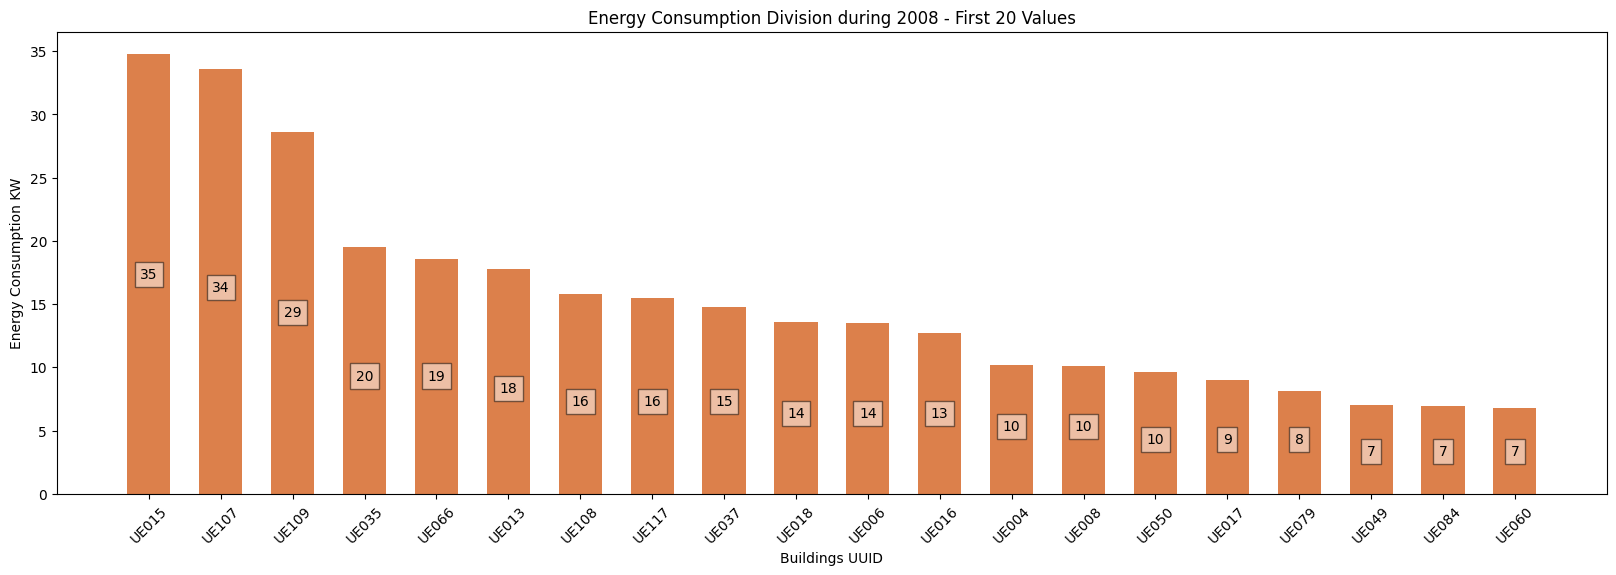

In [120]:
### Graph 1 --> Energy Consumption Division during 2008

### Analysis values
year = 2008
data_range = 20
fig_size = (20,6)

### Prepare data
mask_year_2008 = ee_dataset['YEAR'] == year
y2008_data = ee_dataset[mask_year_2008]['CONSUMPTION']
y2008_data = y2008_data.sort_values(ascending=False)
#print(y2008_data)

## Plot Graphs
bar_plot(fig_size, y2008_data.index.values, y2008_data.values, data_range, 'Buildings UUID', 'Energy Consumption KW', 'Energy Consumption Division during 2008 - First 20 Values', y_labels=True, xrotation=True )

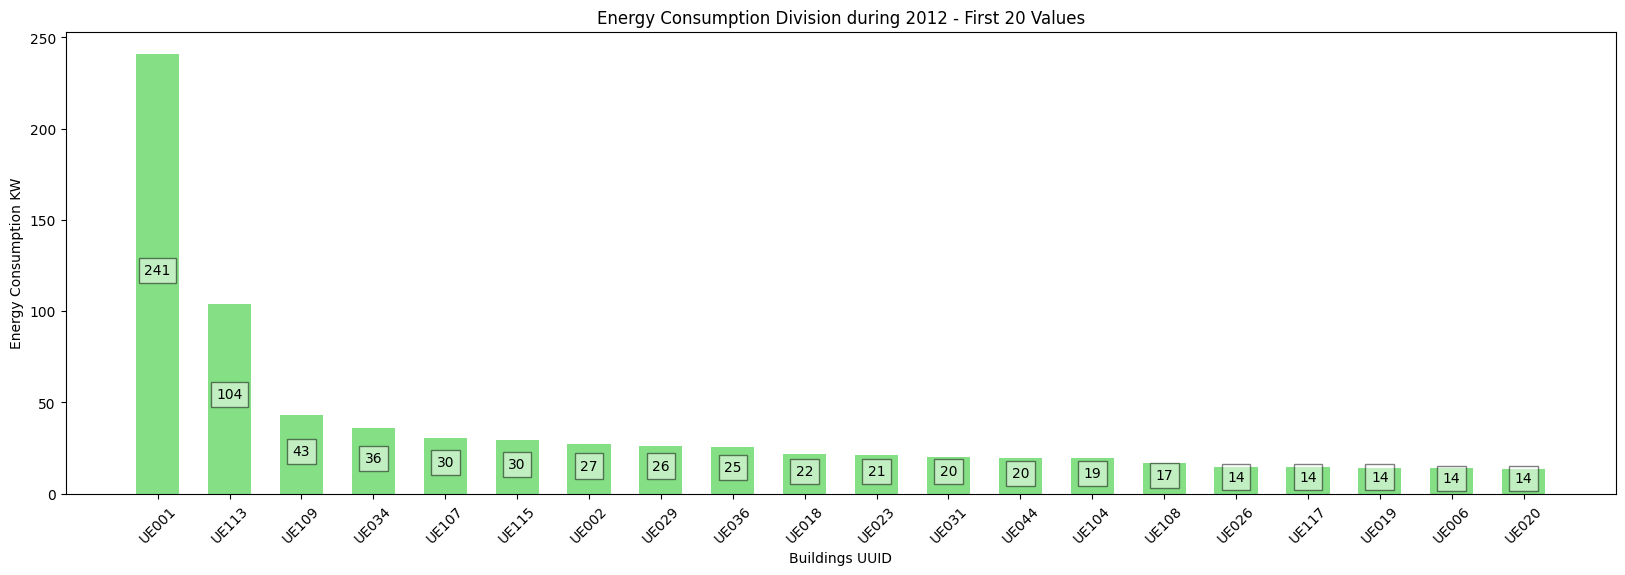

In [121]:
### Graph 2 --> Energy Consumption Division during 2012

### Analysis values
year = 2012
data_range = 20
fig_size = (20,6)

### Prepare data
mask_year = ee_dataset['YEAR'] == year
byyear_data = ee_dataset[mask_year]['CONSUMPTION']
byyear_data = byyear_data.sort_values(ascending=False)
#print(y2008_data.index.values)

## Plot Graphs
bar_plot(fig_size, byyear_data.index.values, byyear_data.values, data_range, 'Buildings UUID', 'Energy Consumption KW', 'Energy Consumption Division during 2012 - First 20 Values', color='#85e085', y_labels=True, xrotation=True )

**First annotations**: no corresponding betweeen years

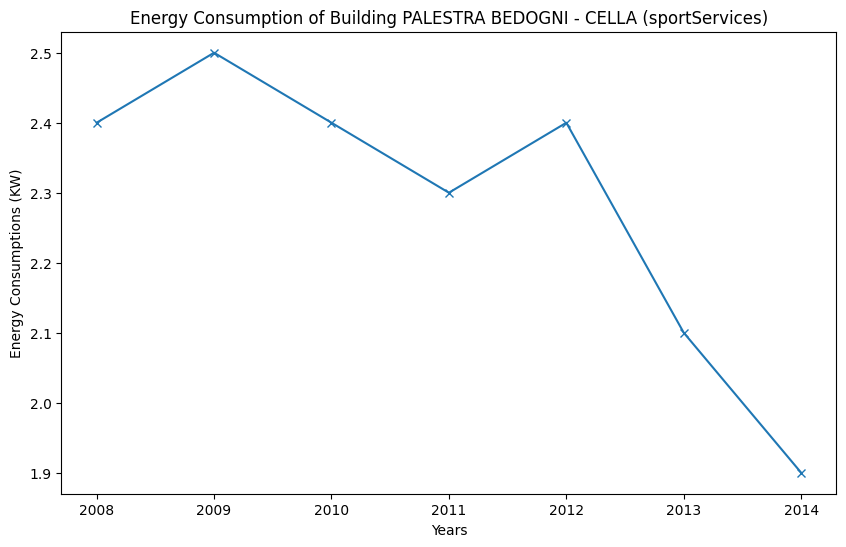

In [122]:
### Graph 3 --> energy consumption of a specific structure during years

building_uuid = 'UE012'
building_eeconsumption = ee_dataset.loc[building_uuid,['YEAR','CONSUMPTION']].sort_values('YEAR')
building_name = buildings_dataset.loc[building_uuid,'NAME']
building_type = buildings_dataset.loc[building_uuid,'TYPE']
#print(building_type)

### Line Plot
plot((10,6),building_eeconsumption['YEAR'].values, building_eeconsumption['CONSUMPTION'].values, 'Years', 'Energy Consumptions (KW)', f'Energy Consumption of Building {building_name} ({building_type})' )


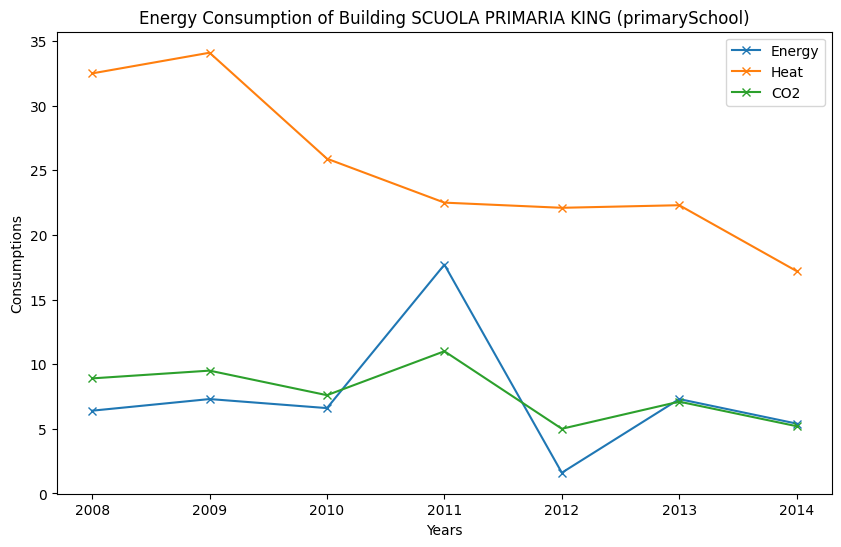

In [123]:
### Graph 4 --> consumptions of a specific structure during years
building_uuid = 'UE069'
building_eeconsumption = ee_dataset.loc[building_uuid,['YEAR','CONSUMPTION']].sort_values('YEAR')
building_ehconsumption = eh_dataset.loc[building_uuid,['YEAR','CONSUMPTION']].sort_values('YEAR')
building_eco2consumption = eco2_dataset.loc[building_uuid,['YEAR','VALUE']].sort_values('YEAR')
building_name = buildings_dataset.loc[building_uuid,'NAME']
building_type = buildings_dataset.loc[building_uuid,'TYPE']
#print(building_ehconsumption['CONSUMPTION'].values)

### Line Plot
multiple_plot((10,6),[building_eeconsumption['YEAR'].values, building_ehconsumption['YEAR'].values, building_eco2consumption['YEAR'].values], [building_eeconsumption['CONSUMPTION'].values, building_ehconsumption['CONSUMPTION'].values, building_eco2consumption['VALUE'].values], 'Years', 'Consumptions', f'Energy Consumption of Building {building_name} ({building_type})', ylabels=['Energy', 'Heat', 'CO2'] )

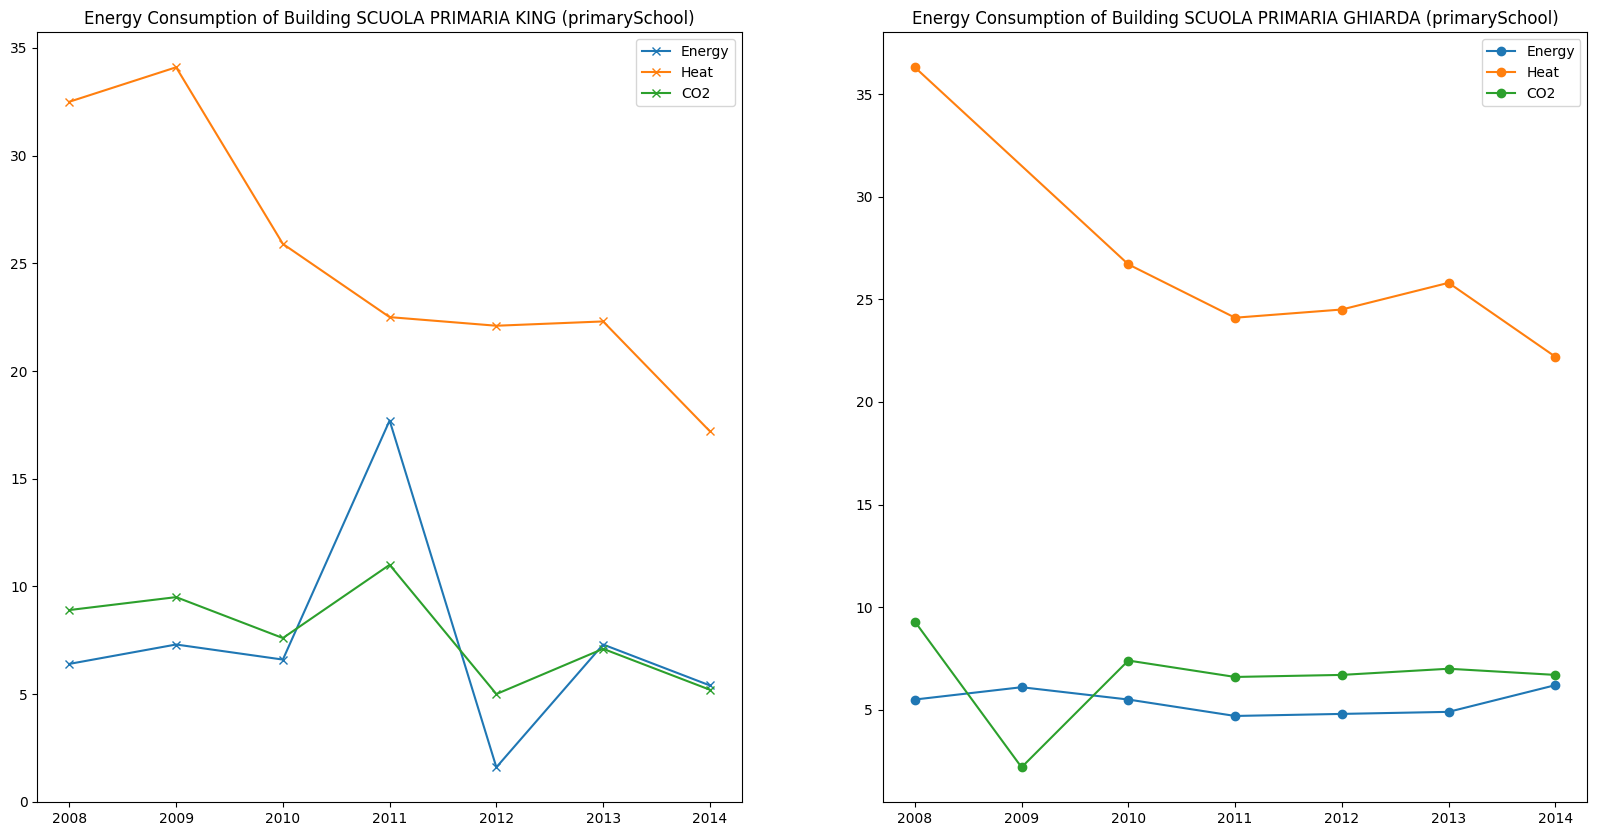

In [124]:
### Graph 5 --> compare consumption of two structures of the same type
building_uuid1 = 'UE069'
building_uuid2 = 'UE068'
building_eeconsumption1 = ee_dataset.loc[building_uuid1,['YEAR','CONSUMPTION']].sort_values('YEAR')
building_ehconsumption1 = eh_dataset.loc[building_uuid1,['YEAR','CONSUMPTION']].sort_values('YEAR')
building_eco2consumption1 = eco2_dataset.loc[building_uuid1,['YEAR','VALUE']].sort_values('YEAR')
building_name1 = buildings_dataset.loc[building_uuid1,'NAME']
building_type1 = buildings_dataset.loc[building_uuid1,'TYPE']
building_eeconsumption2 = ee_dataset.loc[building_uuid2,['YEAR','CONSUMPTION']].sort_values('YEAR')
building_ehconsumption2 = eh_dataset.loc[building_uuid2,['YEAR','CONSUMPTION']].sort_values('YEAR')
building_eco2consumption2 = eco2_dataset.loc[building_uuid2,['YEAR','VALUE']].sort_values('YEAR')
building_name2 = buildings_dataset.loc[building_uuid2,'NAME']
building_type2 = buildings_dataset.loc[building_uuid2,'TYPE']

## Graph data
year1 = [building_eeconsumption1['YEAR'].values, building_ehconsumption1['YEAR'].values, building_eco2consumption1['YEAR'].values]
consumption1 = [building_eeconsumption1['CONSUMPTION'].values, building_ehconsumption1['CONSUMPTION'].values, building_eco2consumption1['VALUE'].values]
year2 = [building_eeconsumption2['YEAR'].values, building_ehconsumption2['YEAR'].values, building_eco2consumption2['YEAR'].values]
consumption2 = [building_eeconsumption2['CONSUMPTION'].values, building_ehconsumption2['CONSUMPTION'].values, building_eco2consumption2['VALUE'].values]
ylabel = 'Years'
xlabel = 'Consumptions'
title1 = f'Energy Consumption of Building {building_name1} ({building_type1})'
title2 = f'Energy Consumption of Building {building_name2} ({building_type2})'
ylabels=['Energy', 'Heat', 'CO2']

### Line Plot
fig, axs = plt.subplots(1,2,figsize=(20,10))

## Figure 1
axs[0].set_title(title1)
for i in range(len(consumption1)):
    axs[0].plot(year1[i], consumption1[i], marker='x',label=ylabels[i])
axs[0].legend()

## Figure 2
axs[1].set_title(title2)
for i in range(len(consumption1)):
    axs[1].plot(year2[i], consumption2[i], marker='o',label=ylabels[i])
axs[1].legend()

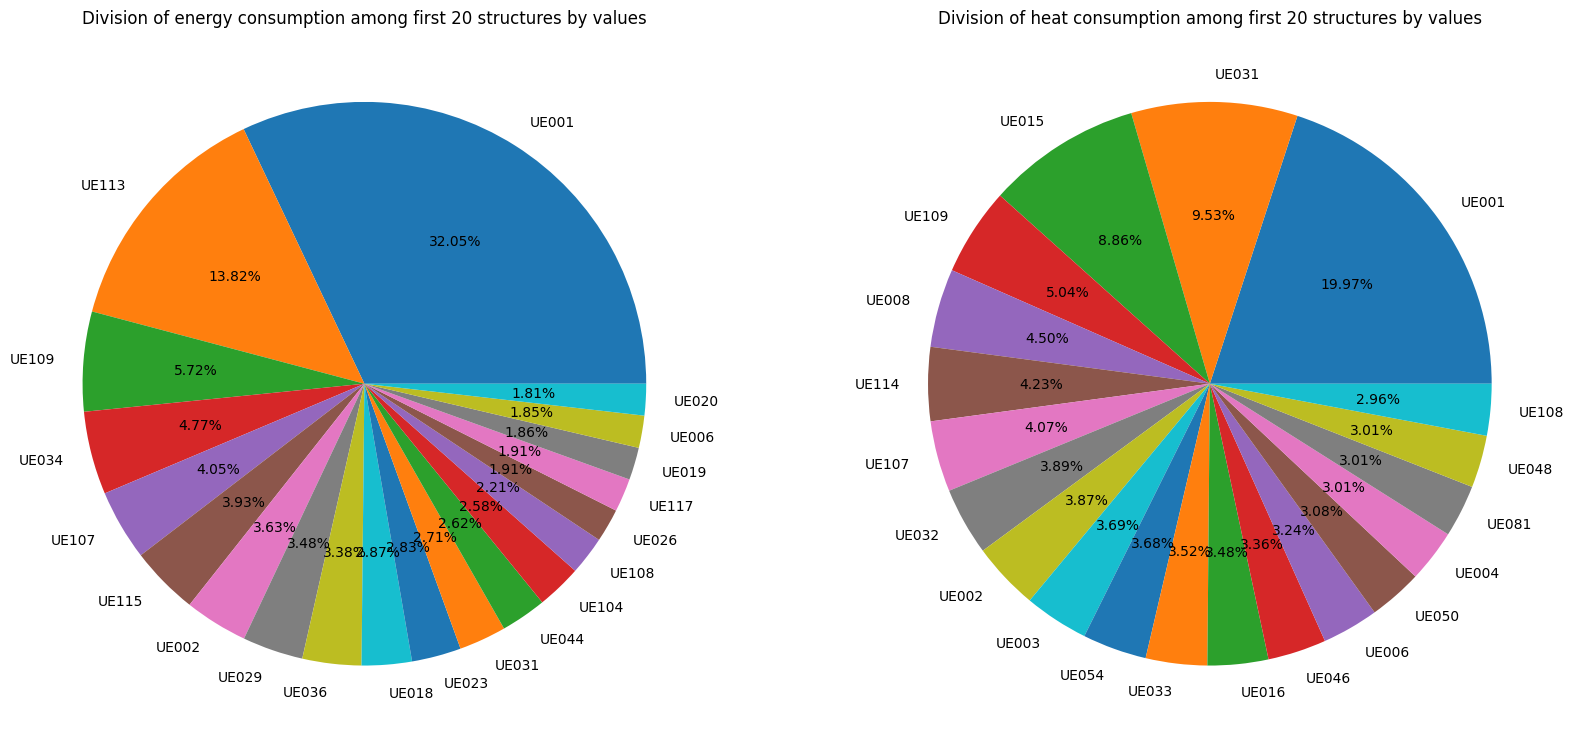

In [125]:
### Final Graphs --> Division of consumptions among buildings during a specific year

### Analysis values
year = 2012
data_range = 20
fig_size = (20,6)

### Prepare data
mask_year = ee_dataset['YEAR'] == year
maskeh_year = eh_dataset['YEAR'] == year
byyear_eedata = ee_dataset[mask_year]['CONSUMPTION']
byyear_eedata = byyear_eedata.sort_values(ascending=False)
byyear_ehdata = eh_dataset[maskeh_year]['CONSUMPTION']
byyear_ehdata = byyear_ehdata.sort_values(ascending=False)
#print(byyear_ehdata)

## Plot Graphs
fig, axs = plt.subplots(1,2,figsize=(20,10))

## Figure 1
axs[0].set_title('Division of energy consumption among first 20 structures by values')
axs[0].pie(byyear_eedata.values[:data_range], labels=byyear_eedata.index.values[:data_range], autopct='%.2f%%')

## Figure 2
axs[1].set_title('Division of heat consumption among first 20 structures by values')
axs[1].pie(byyear_ehdata.values[:data_range], labels=byyear_ehdata.index.values[:data_range], autopct='%.2f%%')

plt.show()

#### 2) The division (in percentage) of energy consumption among different types of energy units (buildings, football fields, etc.)

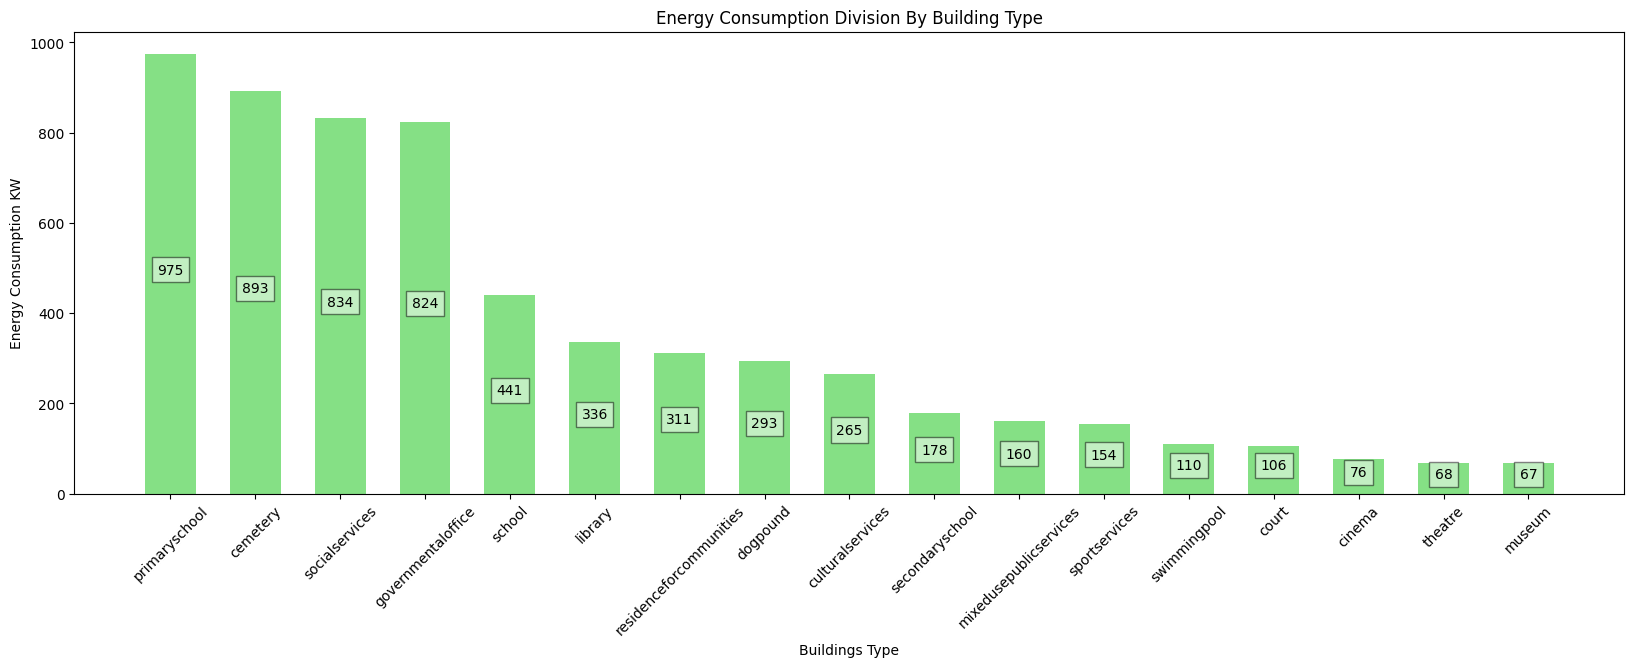

In [126]:
### Elaborate Data
eedata_bytype = ee_dataset.groupby(['TYPE']).sum()['CONSUMPTION'].sort_values(ascending=False)

### Plot
bar_plot((20,6), eedata_bytype.index.values, eedata_bytype.values, len(eedata_bytype.index.values), 'Buildings Type', 'Energy Consumption KW', 'Energy Consumption Division By Building Type', color='#85e085', y_labels=True, xrotation=True )

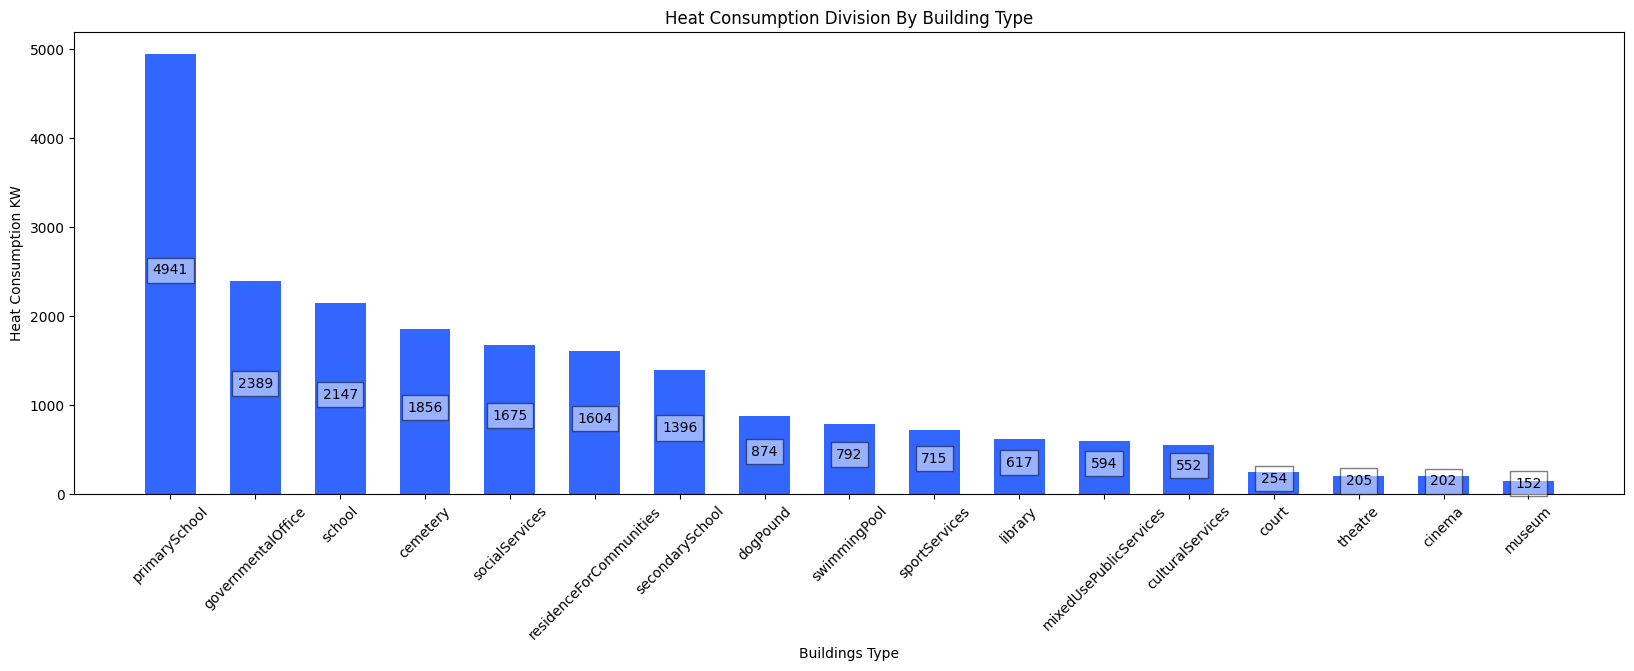

In [127]:
ehdata_bytype = eh_dataset.groupby(['TYPE']).sum()['CONSUMPTION'].sort_values(ascending=False)

bar_plot((20,6), ehdata_bytype.index.values, ehdata_bytype.values, len(ehdata_bytype.index.values), 'Buildings Type', 'Heat Consumption KW', 'Heat Consumption Division By Building Type', color='#3366ff', y_labels=True, xrotation=True )

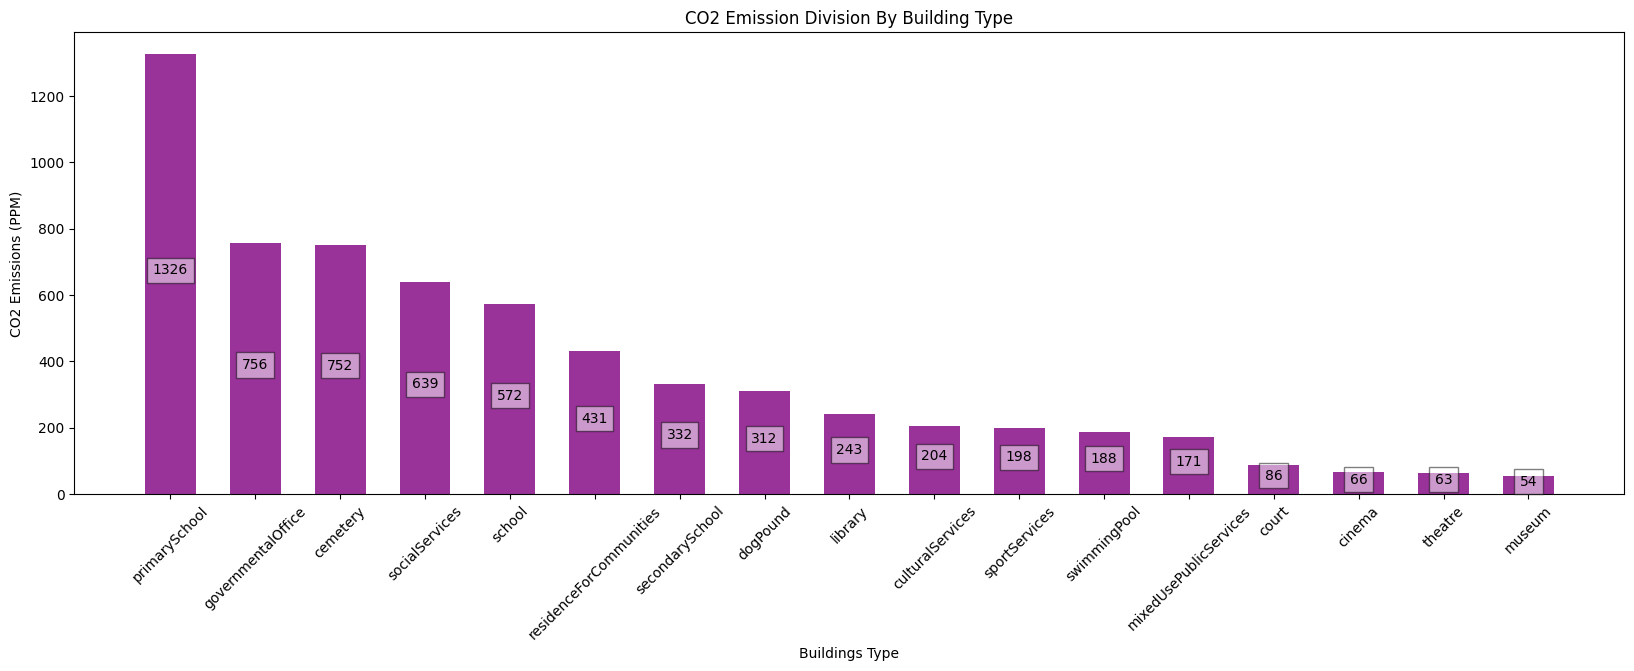

In [128]:
eco2data_bytype = eco2_dataset.groupby(['TYPE']).sum()['VALUE'].sort_values(ascending=False)

bar_plot((20,6), eco2data_bytype.index.values, eco2data_bytype.values, len(eco2data_bytype.index.values), 'Buildings Type', 'CO2 Emissions (PPM)', 'CO2 Emission Division By Building Type', color='#993399', y_labels=True, xrotation=True )

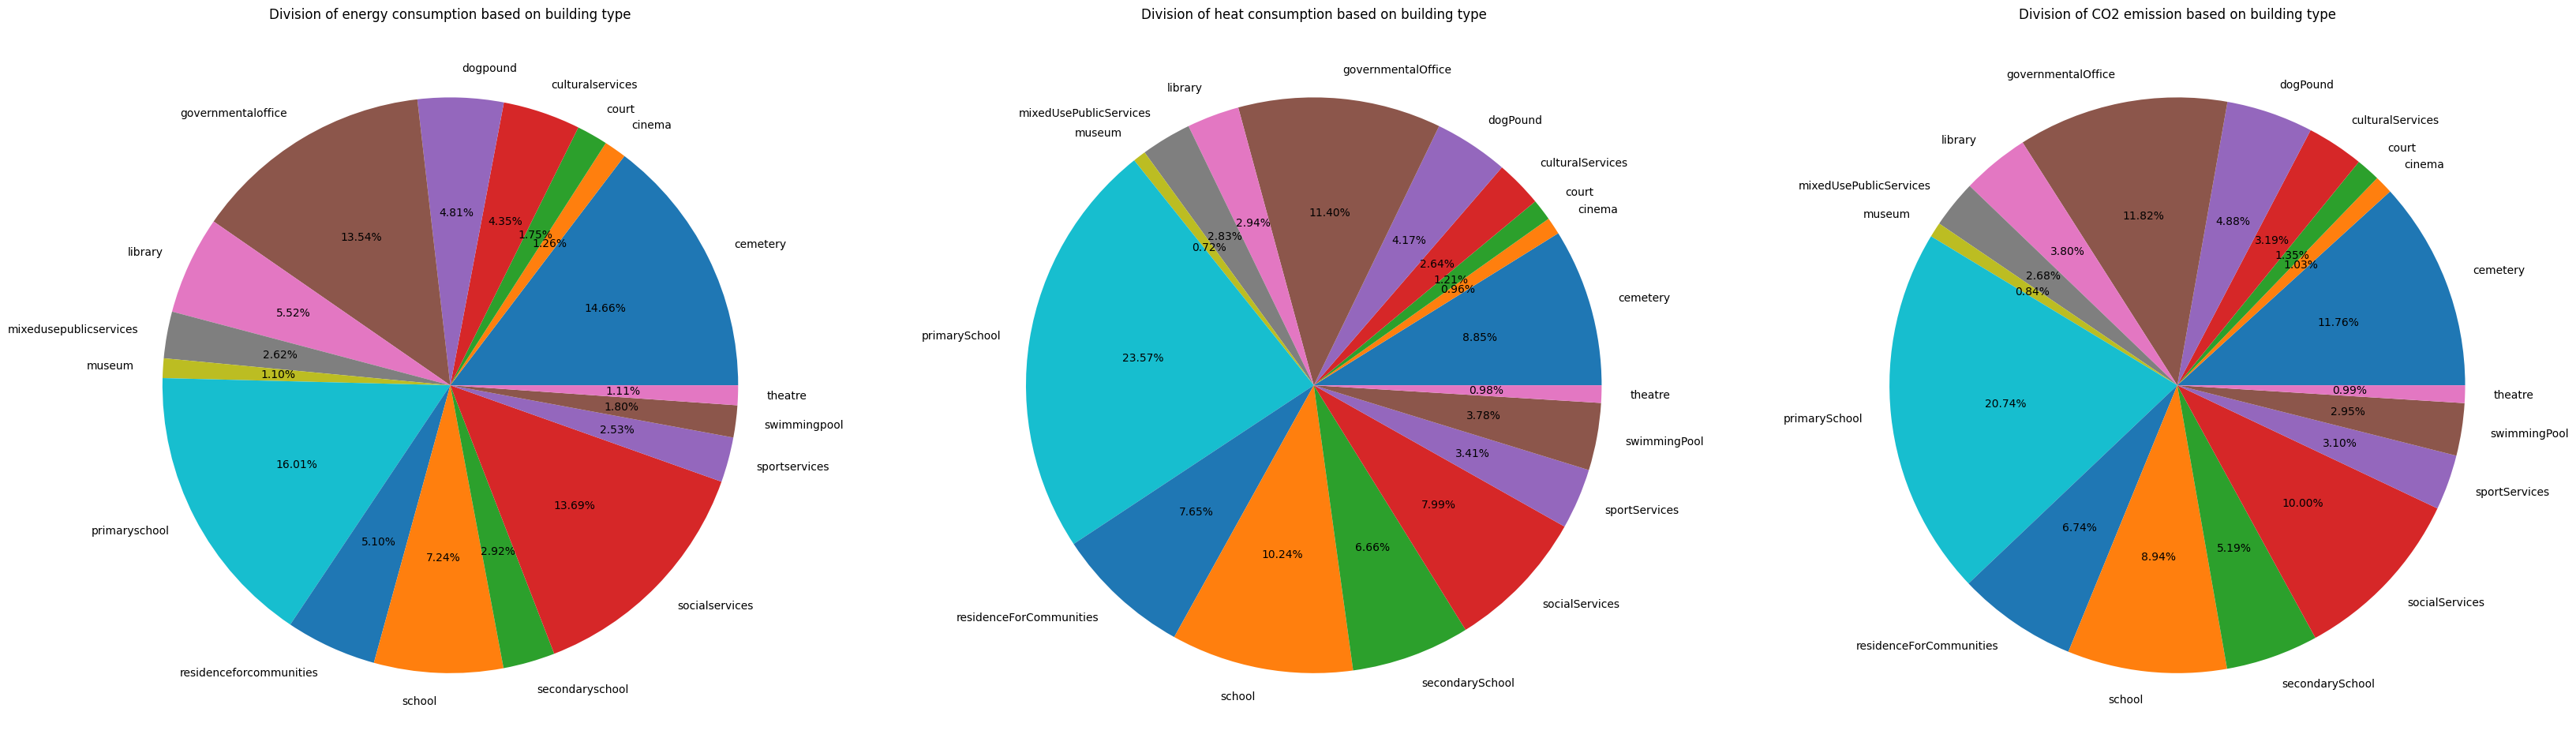

In [129]:
### Get Data
eedata_bytype = ee_dataset.groupby(['TYPE']).sum()['CONSUMPTION']
ehdata_bytype = eh_dataset.groupby(['TYPE']).sum()['CONSUMPTION']
eco2data_bytype = eco2_dataset.groupby(['TYPE']).sum()['VALUE']
#print(eedata_bytype)

## Plot Graphs
fig, axs = plt.subplots(1,3,figsize=(40,20))

## Figure 1
axs[0].set_title('Division of energy consumption based on building type')
axs[0].pie(eedata_bytype.values, labels=eedata_bytype.index.values, autopct='%.2f%%')

## Figure 2
axs[1].set_title('Division of heat consumption based on building type')
axs[1].pie(ehdata_bytype.values, labels=ehdata_bytype.index.values, autopct='%.2f%%')

## Figure 3
axs[2].set_title('Division of CO2 emission based on building type')
axs[2].pie(eco2data_bytype.values, labels=eco2data_bytype.index.values, autopct='%.2f%%')
plt.show()

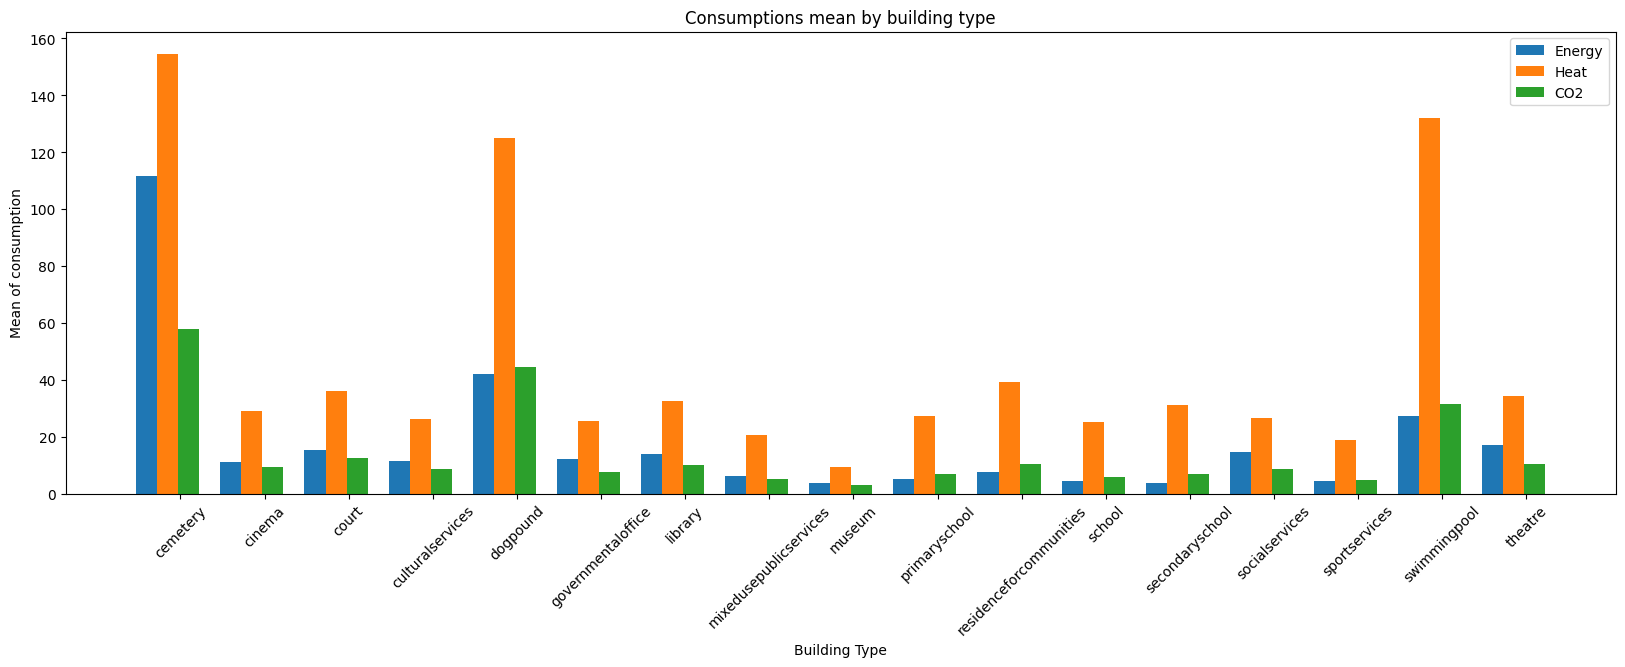

In [148]:
### Get Data
eedata_bytype = ee_dataset[['TYPE','CONSUMPTION']].groupby(['TYPE']).mean()['CONSUMPTION'].sort_index()
ehdata_bytype = eh_dataset[['TYPE','CONSUMPTION']].groupby(['TYPE']).mean()['CONSUMPTION'].sort_index()
eco2data_bytype = eco2_dataset[['TYPE','VALUE']].groupby(['TYPE']).mean()['VALUE'].sort_index()
#print(eedata_bytype)

### Grouped bar chart
X_axis = eedata_bytype.index.values
X_list = np.arange(len(X_axis))
width = 0.25

# Plot Graphs
plt.figure(figsize=(20,6))
plt.bar(X_list, eedata_bytype.values, width, label = 'Energy') 
plt.bar(X_list + width, ehdata_bytype.values, width, label = 'Heat') 
plt.bar(X_list + width*2, eco2data_bytype.values, width, label = 'CO2') 
plt.xticks(X_list + 0.4, X_axis) 
plt.xlabel("Building Type") 
plt.xticks(rotation=45)
plt.ylabel("Mean of consumption") 
plt.title("Consumptions mean by building type") 
plt.legend() 
plt.show()

#### 3) The division (in percentage) of energy consumption correlated with year of construction

#### 4) The mean of energy consumption during the time period

#### 5) The comparison of data with regional values, if possible, to evaluate the difference from regional means

#### 6) The comparison of data with regional values, if possible, to understand the weight of Reggio Emilia compared to data in Emilia Romagna